## 深度学习实现鸢尾花分类
### 1. 数据打包和分类

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split


X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 数据预处理，如果不预处理就会梯度爆炸，这里用标准化预处理数据
_mean = X_train.mean(axis=0)
_std = X_train.std(axis=0) + 1e-9
X_train = (X_train - _mean) / _std
X_test = (X_test - _mean) / _std

In [2]:
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

# 数据打包
#自定义一个数据集类
class MyDataset(Dataset):
    '''
    自定义一个房价Dataset
    '''
    def __init__(self, X, y):
        self.X = X
        self.y = y
    def __len__(self):
        '''
        :return: counts of samples in dataset
        '''
        return len(self.X)
    def __getitem__(self, idx):
        '''
        :param idx:
        :return: tensor of samples in dataset
        '''
        return torch.tensor(data=self.X[idx], dtype=torch.float32), torch.tensor(data=self.y[idx], dtype=torch.long)

#训练集加载器
house_train_dataset = MyDataset(X_train, y_train)
house_train_dataloader = DataLoader(house_train_dataset, batch_size=4, shuffle=True)

#测试集加载器
house_test_dataset = MyDataset(X_test, y_test)
house_test_dataloader = DataLoader(house_test_dataset, batch_size=8, shuffle=False)

In [3]:
from torch import nn


# 方法三，更通用
class Model(nn.Module):
    def __init__(self, n_features=4, n_classes=3):
        '''
        接收超参
        定义处理的层
        '''
        #先初始化父类
        super(Model, self).__init__()
        # 定义一个线性层（做一次矩阵变换）
        self.linear1 = nn.Linear(in_features=n_features, out_features=n_features)

    def forward(self, x):
        '''
        模型的正向传播逻辑
        '''
        x = self.linear1(x)
        return x

model = Model(n_features=4)

In [4]:
def get_acc(dataloader):
    # 模型设置为评估模式（batch Norm、，LayerNorm，Dropout层在train模式和evel模式下行为不同）
    model.eval()
    # 收集每个batch的loss
    acces = []
    # 构建一个无梯度的环境，底层不会自动构建一个自动图，节约资源
    with torch.no_grad():
        for X, y in dataloader:
            y_pred = model(X)
            y_pred = y_pred.argmax(dim=1)
            acc = (y_pred == y).to(dtype=torch.float32).mean().item()
            acces.append(acc)
        # 计算每个批量损失的平均值
        final_acc= round(sum(acces) / len(acces),ndigits=5)
    return final_acc

In [11]:
# 训练模型

epochs = 50 #定义训练的轮次
learning_rate = 1e-2 #学习率
loss_fn = nn.CrossEntropyLoss() #定义损失函数
optimizer = torch.optim.SGD(params=model.parameters(), lr=learning_rate) #定义优化器

#开始训练过程
def train():
    # 记录训练过程
    train_acces = []
    test_acces = []
    #轮次循环
    for epoch in range(epochs):
        model.train()
        # 每个批量
        for X, y in house_train_dataloader:
            #开始正向传播
            y_pred = model(X)
            #误差计算
            loss = loss_fn(y_pred, y)
            # 反向传播
            loss.backward()
            #优化一步
            optimizer.step()
            #清空梯度
            optimizer.zero_grad()
            # # 打印当前批量损失，防止梯度爆炸
            # print(loss)
        train_acc = get_acc(house_train_dataloader)
        test_acc = get_acc(house_test_dataloader)
        train_acces.append(train_acc)
        test_acces.append(test_acc)
        print(f"当前是第{epoch + 1}轮训练\n训练集准确率为{train_acc}\n测试集准确率为{test_acc}\n")
    return train_acces, test_acces

In [12]:
train_acces, test_acces = train()

当前是第1轮训练
训练集准确率为0.91667
测试集准确率为0.96875

当前是第2轮训练
训练集准确率为0.91667
测试集准确率为0.96875

当前是第3轮训练
训练集准确率为0.91667
测试集准确率为0.96875

当前是第4轮训练
训练集准确率为0.91667
测试集准确率为0.96875

当前是第5轮训练
训练集准确率为0.91667
测试集准确率为0.96875

当前是第6轮训练
训练集准确率为0.91667
测试集准确率为0.96875

当前是第7轮训练
训练集准确率为0.925
测试集准确率为0.96875

当前是第8轮训练
训练集准确率为0.925
测试集准确率为0.96875

当前是第9轮训练
训练集准确率为0.925
测试集准确率为0.96875

当前是第10轮训练
训练集准确率为0.925
测试集准确率为0.96875

当前是第11轮训练
训练集准确率为0.925
测试集准确率为0.96875

当前是第12轮训练
训练集准确率为0.93333
测试集准确率为0.96875

当前是第13轮训练
训练集准确率为0.93333
测试集准确率为0.96875

当前是第14轮训练
训练集准确率为0.93333
测试集准确率为0.96875

当前是第15轮训练
训练集准确率为0.93333
测试集准确率为0.96875

当前是第16轮训练
训练集准确率为0.94167
测试集准确率为0.96875

当前是第17轮训练
训练集准确率为0.94167
测试集准确率为0.96875

当前是第18轮训练
训练集准确率为0.94167
测试集准确率为0.96875

当前是第19轮训练
训练集准确率为0.94167
测试集准确率为0.96875

当前是第20轮训练
训练集准确率为0.94167
测试集准确率为0.96875

当前是第21轮训练
训练集准确率为0.94167
测试集准确率为0.96875

当前是第22轮训练
训练集准确率为0.94167
测试集准确率为0.96875

当前是第23轮训练
训练集准确率为0.94167
测试集准确率为0.96875

当前是第24轮训练
训练集准确率为0.94167
测试集准确率为0.96875

当前是第25轮训练
训练集准确率为0.94167
测试集准确率为0.9

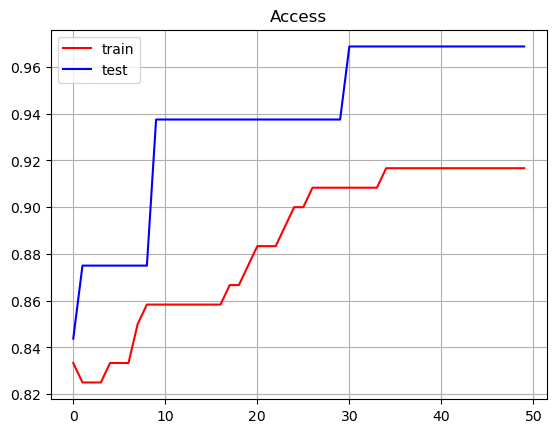

In [10]:
# 结果绘制
from matplotlib import pyplot as plt

plt.plot(train_acces,label='train',color='r')
plt.plot(test_acces,label='test',color='b')
plt.title('Access')
plt.legend()
plt.grid(True)